# Perkenalan Dataset

Dataset ini berisi data hasil ekstraksi fitur dari email (berbasis kata-kata). Setiap baris mewakili satu email, dan setiap kolom (kecuali label) menunjukkan frekuensi kemunculan kata tertentu di email tersebut.
📌 Kolom Utama:
- Email No. → Nomor urut email
- Ribuan kolom kata (contoh: you, free, click) → jumlah kata tersebut di email

- Prediction → label spam:

1: Spam

0: Non-Spam (biasa)

Jumlah fitur: 3001 (termasuk label)
link dataset dapat diakses disini https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset

# Import Libreries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os


#Load dataset

In [ ]:
# Load dataset
df = pd.read_csv("emails.csv")

# Tampilkan 5 data awal
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# Exploratory Data Analysis

In [ ]:
# Info umum
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None


In [ ]:
# Statistik deskriptif
print(df.describe())



               the           to          ect          and          for  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000   
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...  \
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  ...   
mean      2.627030    55.517401     2.466551     2.024362    10.600155  ...   
std       6.229845    87.574172     4.314444     6.967878    19.281892  ...   
min       0.00000

In [ ]:
# Cek missing values
print(df.isnull().sum())



Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


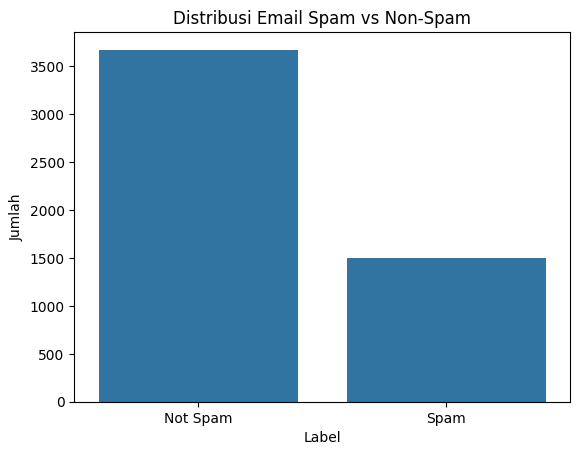

,proportion
Prediction,
0,0.709977
1,0.290023


In [ ]:
sns.countplot(x='Prediction', data=df)
plt.title("Distribusi Email Spam vs Non-Spam")
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

# Persentase
df['Prediction'].value_counts(normalize=True)


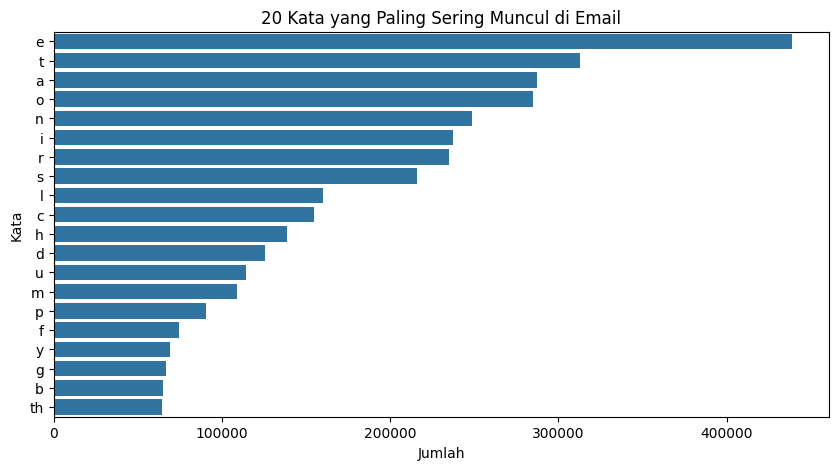

In [ ]:
frequencies = df.drop(columns=["Email No.", "Prediction"]).sum().sort_values(ascending=False)
top_words = frequencies.head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title("20 Kata yang Paling Sering Muncul di Email")
plt.xlabel("Jumlah")
plt.ylabel("Kata")
plt.show()


# Preprocessing


In [44]:
# Ambil 150 fitur teratas
top_features = frequencies.head(150).index.tolist()
X = df[top_features]
y = df["Prediction"]

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_preprocessed = pd.DataFrame(X_scaled, columns=top_features)
df_preprocessed["Prediction"] = y.reset_index(drop=True)

# Simpan hasil preprocessing
output_path = "../preprocessing/emails_preprocessed.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_preprocessed.to_csv(output_path, index=False)
print(f"✅ Data preprocessed disimpan ke: {output_path}")


✅ Data preprocessed disimpan ke: ../preprocessing/emails_preprocessed.csv
